In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("spam.csv")

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data['Category'].describe()

count     5572
unique       2
top        ham
freq      4825
Name: Category, dtype: object

In [6]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
data.duplicated().any()

True

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(5157, 2)

In [ ]:
data['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

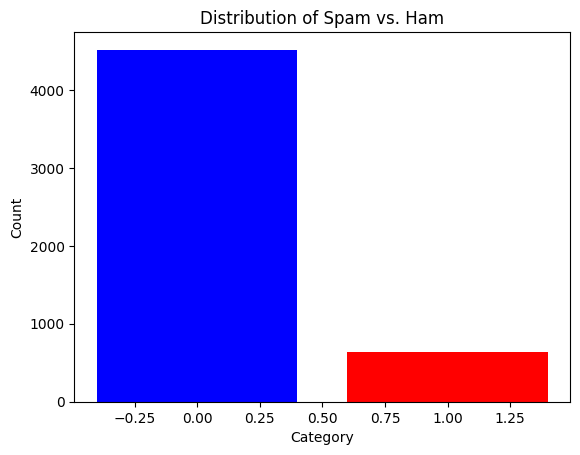

In [30]:
category_counts = data['Category'].value_counts()
plt.bar(category_counts.index,category_counts,color=['Blue','Red'])
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Spam vs. Ham")
plt.xticks(rotation=0)
plt.show()

In [13]:
le = LabelEncoder()
data['Category']=le.fit_transform(data['Category'])
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data['Message']=data['Message'].str.lower()
data['Message']=data['Message'].str.strip()
data.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [17]:
cv = CountVectorizer()
x=cv.fit_transform(data['Message']).toarray()
y = data['Category']

In [20]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_val)
log_acc = round(accuracy_score(y_val,y_pred)*100,2)
print(log_acc)

98.06


In [27]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_val)
svm_acc=round(accuracy_score(y_val,y_pred)*100,2)
print(svm_acc)

97.97
